In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from feature_engine.outlier_removers import Winsorizer

ModuleNotFoundError: No module named 'feature_engine.outlier_removers'

In [2]:
!pip install -U feature-engine
from feature_engine.outlier_removers import Winsorizer

ModuleNotFoundError: No module named 'feature_engine.outlier_removers'

In [3]:
df = pd.read_excel("Desktop/msga-order.xlsx")

In [5]:
df.head()

,Web_Order_ID,MobileNo,OrderDate,OrderNo,EnqNo,EmailId,CustomerName,Address1,Address2,Address3,Location,State,PartNo,Qty,PartMRP,AmountPaid,TotalBillingAmount
0,WMA220501001925,9.884887e+09,2022-05-01 00:19:25.967,AOD22000006,ACC22000010,gbabu88@gmail.com,Ganesh Babu,62B,"Annai Velankanni Nagar Phase 2, Mugalivakkam",Next to Shakthi Super Market,CHENNAI,TAMIL NADU,990J0M55R02-020,1.0,1090.0,870.0,1090.0
1,WMA220501011241,9.419739e+09,2022-05-01 01:12:41.837,AOD22000001,ACC22000002,manishsabraj@gmail.com,Manish Sabraj,Quarter No 3,Manu Marg,SMVD UNIVERSITY Katra,JAMMU,JAMMU AND KASHMIR,990J0M81RA3-010,1.0,1390.0,0.0,1390.0
2,WMA220501013210,9.035571e+09,2022-05-01 01:32:10.917,AOD22000009,ACC22000020,dsk275@outlook.com,Shashikiran D,"House No. 275, First Main, White City Layout,","Seegehalli, Krishanarajapuram, Bangalore",Next to VITALS Hospital / Diagnostics,BANGALORE,KARNATAKA,75901M65MF0,1.0,2288.0,1711.0,2288.0
3,WMA220501013819,9.035571e+09,2022-05-01 01:38:19.627,AOD22000003,ACC22000009,dsk275@outlook.com,Shashikiran D,"House No. 275, First Main, White City Layout,","Seegehalli, Krishanarajapuram, Bangalore",Next to VITALS Hospital / Diagnostics,BANGALORE,KARNATAKA,990J0M65MU0-010,1.0,1315.0,1315.0,1315.0
4,WMA220501062333,8.801445e+09,2022-05-01 06:23:33.897,AOD22000009,ACC22000012,snmohtada@gmail.com,Syed Mohtada,16-10-48/B,New Malakpet,Nalgonda X Road Flyover Bridge,HYDERABAD,TELANGANA,990J0M82P13-210,1.0,699.0,0.0,1798.0


In [7]:
df=df.dropna()

In [8]:
monetary = df.groupby('MobileNo')['TotalBillingAmount'].sum()
monetary = monetary.reset_index()
monetary.tail()

,MobileNo,TotalBillingAmount
4879,9.999988e+09,6276.0
4880,9.999990e+09,1130.0
4881,9.999997e+09,2111.0
4882,9.999999e+09,11652.0
4883,1.000000e+10,425.0


In [9]:
#here we are calculating recency by subtracting the very recent date with the last transaction date of the customers.

df['OrderDate'] = pd.to_datetime(df['OrderDate'],format='%Y-%m-%d %H:%M:%S')
df['Diff'] = max(df['OrderDate']) - df['OrderDate']
recency = df.groupby('MobileNo')['Diff'].min()
recency = recency.reset_index()
recency.head()

C:\Users\AGL\AppData\Local\Temp\ipykernel_4436\3152218995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OrderDate'] = pd.to_datetime(df['OrderDate'],format='%Y-%m-%d %H:%M:%S')
C:\Users\AGL\AppData\Local\Temp\ipykernel_4436\3152218995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diff'] = max(df['OrderDate']) - df['OrderDate']


,MobileNo,Diff
0,6.000567e+09,3 days 03:04:55.500000
1,6.005564e+09,102 days 10:35:29.203000
2,6.200285e+09,54 days 02:41:20.340000
3,6.238130e+09,76 days 01:28:03.207000
4,6.238134e+09,11 days 03:41:02.073000


In [10]:
recency

,MobileNo,Diff
0,6.000567e+09,3 days 03:04:55.500000
1,6.005564e+09,102 days 10:35:29.203000
2,6.200285e+09,54 days 02:41:20.340000
3,6.238130e+09,76 days 01:28:03.207000
4,6.238134e+09,11 days 03:41:02.073000
...,...,...
4879,9.999988e+09,93 days 01:41:49.100000
4880,9.999990e+09,38 days 08:13:27.140000
4881,9.999997e+09,97 days 05:22:29.907000
4882,9.999999e+09,65 days 07:52:34.520000


In [11]:
frequency = df.groupby('MobileNo')['OrderDate'].count()
frequency = frequency.reset_index()
frequency.head()

,MobileNo,OrderDate
0,6.000567e+09,1
1,6.005564e+09,1
2,6.200285e+09,2
3,6.238130e+09,1
4,6.238134e+09,3


In [12]:
df.OrderDate.max()

Timestamp('2022-08-31 22:57:27.370000')

In [13]:
recency['Diff'] = recency['Diff'].dt.days
recency.head()

,MobileNo,Diff
0,6.000567e+09,3
1,6.005564e+09,102
2,6.200285e+09,54
3,6.238130e+09,76
4,6.238134e+09,11


In [14]:
rfm = pd.merge(recency,frequency,on='MobileNo', how='inner')

In [15]:
rfm= pd.merge(rfm,monetary,on='MobileNo', how='inner')


In [16]:
rfm.columns = ['MobileNo','Recency','Frequency','Monetary']

In [17]:
rfm

,MobileNo,Recency,Frequency,Monetary
0,6.000567e+09,3,1,790.0
1,6.005564e+09,102,1,490.0
2,6.200285e+09,54,2,1580.0
3,6.238130e+09,76,1,350.0
4,6.238134e+09,11,3,2475.0
...,...,...,...,...
4879,9.999988e+09,93,6,6276.0
4880,9.999990e+09,38,1,1130.0
4881,9.999997e+09,97,1,2111.0
4882,9.999999e+09,65,4,11652.0


In [18]:
scaler = StandardScaler()
rfm_normalized = rfm[['Monetary','Frequency','Recency']]
rfm_normalized

,Monetary,Frequency,Recency
0,790.0,1,3
1,490.0,1,102
2,1580.0,2,54
3,350.0,1,76
4,2475.0,3,11
...,...,...,...
4879,6276.0,6,93
4880,1130.0,1,38
4881,2111.0,1,97
4882,11652.0,4,65


In [19]:
rfm_normalized=scaler.fit_transform(rfm_normalized)
rfm_normalized=pd.DataFrame(rfm_normalized)
rfm_normalized

,0,1,2
0,-0.162431,-0.484199,-1.514537
1,-0.172883,-0.484199,1.303551
2,-0.134908,-0.000396,-0.062794
3,-0.177761,-0.484199,0.563447
4,-0.103726,0.483406,-1.286812
...,...,...,...
4879,0.028700,1.934814,1.047361
4880,-0.150586,-0.484199,-0.518243
4881,-0.116408,-0.484199,1.161224
4882,0.216000,0.967209,0.250327


In [20]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_normalized)

KMeans(max_iter=50, n_clusters=4)

In [21]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_normalized)
    
    ssd.append(kmeans.inertia_)

In [22]:
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_normalized)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_normalized,cluster_labels)
    print("For n_cluster={0},score is{1}".format(num_clusters,silhouette_avg))

For n_cluster=2,score is0.4305263335006093
For n_cluster=3,score is0.43540544452784646
For n_cluster=4,score is0.48092944842367275
For n_cluster=5,score is0.4905034936979532
For n_cluster=6,score is0.42194354226360076
For n_cluster=7,score is0.42744629897690206
For n_cluster=8,score is0.43993475114193675


In [23]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_normalized)

KMeans(max_iter=50, n_clusters=3)

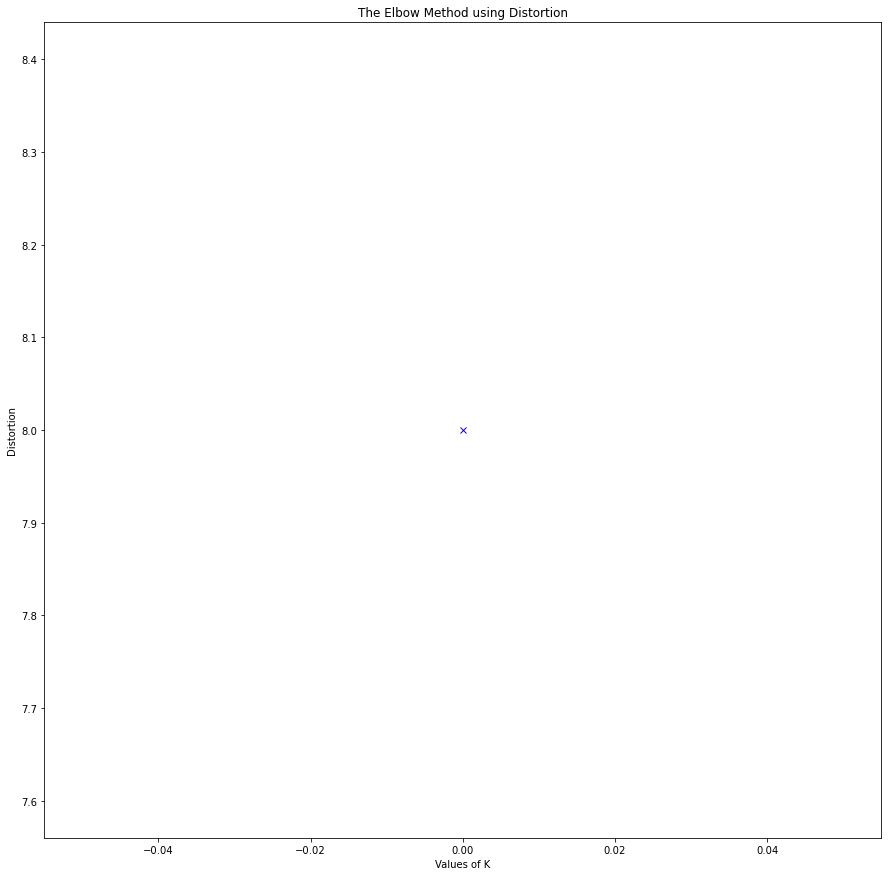

In [55]:
plt.plot(num_clusters,'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [24]:
rfm_normalized.loc[:,'MobileNo'] = rfm['MobileNo']

In [25]:
rfm_normalized

,0,1,2,MobileNo
0,-0.162431,-0.484199,-1.514537,6.000567e+09
1,-0.172883,-0.484199,1.303551,6.005564e+09
2,-0.134908,-0.000396,-0.062794,6.200285e+09
3,-0.177761,-0.484199,0.563447,6.238130e+09
4,-0.103726,0.483406,-1.286812,6.238134e+09
...,...,...,...,...
4879,0.028700,1.934814,1.047361,9.999988e+09
4880,-0.150586,-0.484199,-0.518243,9.999990e+09
4881,-0.116408,-0.484199,1.161224,9.999997e+09
4882,0.216000,0.967209,0.250327,9.999999e+09


In [26]:
rfm_normalized['cluster']=kmeans.labels_
rfm_normalized.head(20)

,0,1,2,MobileNo,cluster
0,-0.162431,-0.484199,-1.514537,6.000567e+09,1
1,-0.172883,-0.484199,1.303551,6.005564e+09,0
2,-0.134908,-0.000396,-0.062794,6.200285e+09,1
3,-0.177761,-0.484199,0.563447,6.238130e+09,0
4,-0.103726,0.483406,-1.286812,6.238134e+09,1
5,-0.145011,-0.484199,0.990430,6.238303e+09,0
6,-0.124107,-0.484199,0.364189,6.261042e+09,0
7,-0.151108,-0.484199,0.534982,6.263720e+09,0
8,-0.116408,-0.484199,-0.205122,6.280648e+09,1
9,-0.014013,-0.484199,-1.087554,6.281744e+09,1


<AxesSubplot:xlabel='cluster', ylabel='0'>

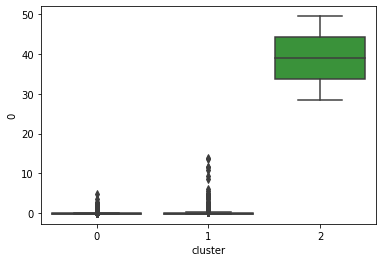

In [27]:
#for Monetary
sns.boxplot(x='cluster', y=0,data = rfm_normalized)

In [28]:
rfm_normalized.columns

Index([0, 1, 2, 'MobileNo', 'cluster'], dtype='object')

<AxesSubplot:xlabel='cluster', ylabel='1'>

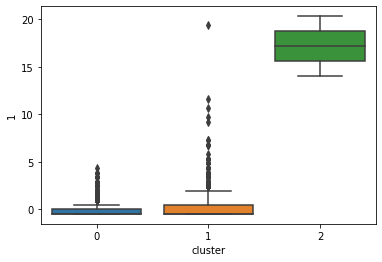

In [29]:
#for frequency
sns.boxplot(x='cluster', y=1, data=rfm_normalized)

<AxesSubplot:xlabel='cluster', ylabel='2'>

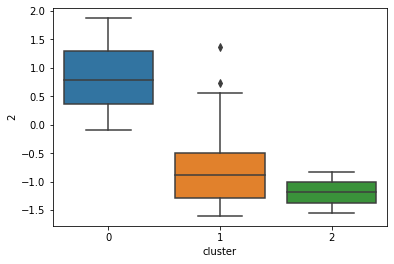

In [30]:
#for Recency
sns .boxplot(x='cluster',y=2,data=rfm_normalized)

C:\Users\AGL\AppData\Local\Temp\ipykernel_4436\2818172786.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,


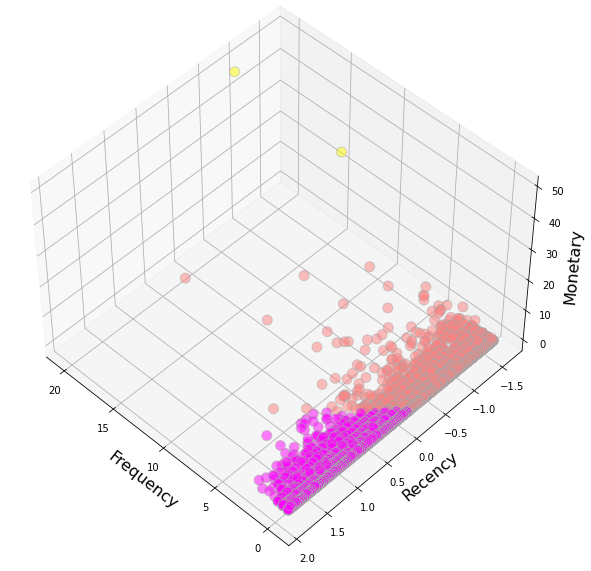

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"]=(15,15)
fig=plt.figure()
plt.clf()
ax = Axes3D(fig,
            rect = [0, 0, .95, .5],
            elev = 48,
            azim = 134)

plt.cla()
ax.scatter(rfm_normalized[1],rfm_normalized[2],rfm_normalized[0],
           c=rfm_normalized['cluster'],
           s=100,
           cmap = 'spring',
           alpha = 0.5,
           edgecolor = 'darkgrey')
ax.set_xlabel('Frequency',fontsize=16)
ax.set_ylabel('Recency',fontsize=16)
ax.set_zlabel('Monetary',fontsize=16)

plt.show()

In [32]:

quantiles = rfm.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [33]:
segmented_rfm = rfm.copy()

In [34]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [35]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,MobileNo,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,6.000567e+09,3,1,790.0,1,4,4
1,6.005564e+09,102,1,490.0,4,4,4
2,6.200285e+09,54,2,1580.0,2,2,3
3,6.238130e+09,76,1,350.0,3,4,4
4,6.238134e+09,11,3,2475.0,1,1,2


In [36]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)
segmented_rfm.head(20)


,MobileNo,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,6.000567e+09,3,1,790.0,1,4,4,144
1,6.005564e+09,102,1,490.0,4,4,4,444
2,6.200285e+09,54,2,1580.0,2,2,3,223
3,6.238130e+09,76,1,350.0,3,4,4,344
4,6.238134e+09,11,3,2475.0,1,1,2,112
5,6.238303e+09,91,1,1290.0,4,4,3,443
6,6.261042e+09,69,1,1890.0,3,4,2,342
7,6.263720e+09,75,1,1115.0,3,4,3,343
8,6.280648e+09,49,1,2111.0,2,4,2,242
9,6.281744e+09,18,1,5050.0,1,4,1,141


In [37]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
segmented_rfm.head(23)

,MobileNo,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,6.000567e+09,3,1,790.0,1,4,4,144,9
1,6.005564e+09,102,1,490.0,4,4,4,444,12
2,6.200285e+09,54,2,1580.0,2,2,3,223,7
3,6.238130e+09,76,1,350.0,3,4,4,344,11
4,6.238134e+09,11,3,2475.0,1,1,2,112,4
5,6.238303e+09,91,1,1290.0,4,4,3,443,11
6,6.261042e+09,69,1,1890.0,3,4,2,342,9
7,6.263720e+09,75,1,1115.0,3,4,3,343,10
8,6.280648e+09,49,1,2111.0,2,4,2,242,8
9,6.281744e+09,18,1,5050.0,1,4,1,141,6


In [38]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  246
Loyal Customers:  1105
Big Spenders:  1208
Almost Lost:  0
Lost Customers:  297
Lost Cheap Customers:  257


In [39]:
segmented_rfm['RFM_Score'].unique()

array([ 9, 12,  7, 11,  4, 10,  8,  6,  5,  3], dtype=int64)

In [40]:
#segmented_rfm.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] }).round(1)

IndentationError: unexpected indent (2143436091.py, line 2)

In [41]:
from scipy import stats
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

C:\Users\AGL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AGL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Recency's: Skew: 0.11799122094921739, : SkewtestResult(statistic=3.3599481351613303, pvalue=0.0007795710592311088)
Frequency's: Skew: 6.390219785718044, : SkewtestResult(statistic=64.36423129527152, pvalue=0.0)


C:\Users\AGL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Monetary's: Skew: 32.222422113066564, : SkewtestResult(statistic=102.1064420073399, pvalue=0.0)


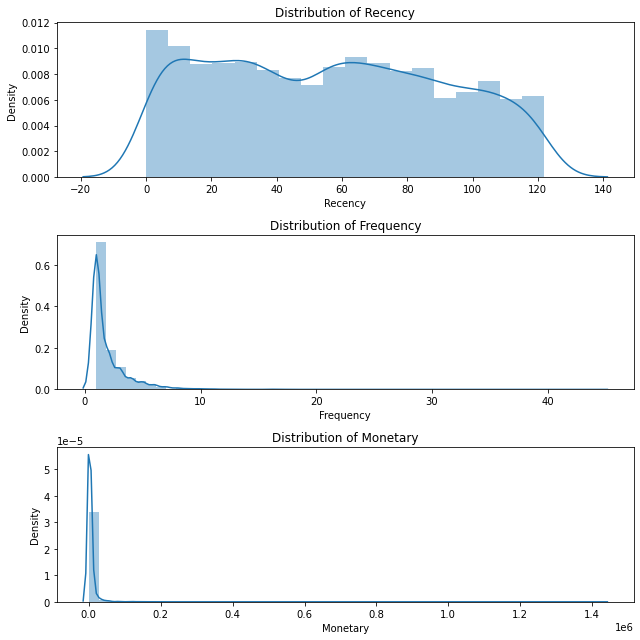

In [42]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(rfm,'Recency')

plt.subplot(3, 1, 2)
check_skew(rfm,'Frequency')

plt.subplot(3, 1, 3)
check_skew(rfm,'Monetary')

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)

In [43]:
df_rfm_log = rfm.copy()

C:\Users\AGL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Recency's: Skew: -1.456748651405287, : SkewtestResult(statistic=-31.351907111374175, pvalue=9.16378310828261e-216)


C:\Users\AGL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Frequency's: Skew: 1.5943032475567045, : SkewtestResult(statistic=33.21063190154927, pvalue=7.560904474160827e-242)


C:\Users\AGL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Monetary's: Skew: 0.1093153852183237, : SkewtestResult(statistic=3.114399560492382, pvalue=0.0018431969897994213)


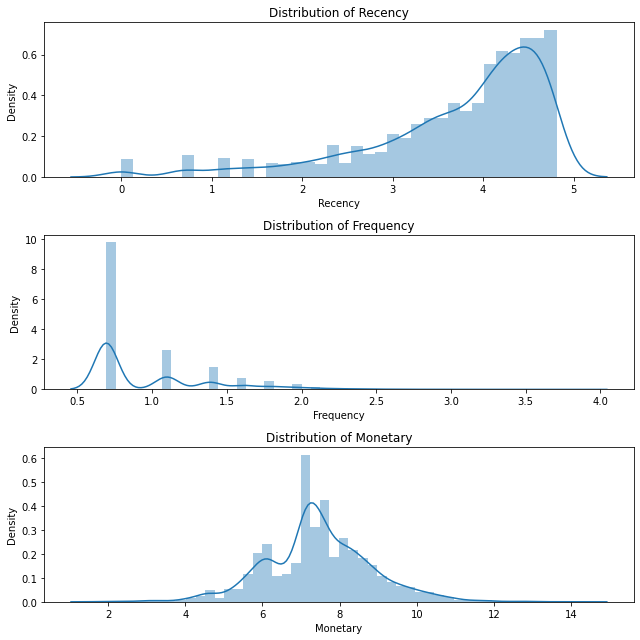

In [44]:
df_rfm_log = np.log(df_rfm_log+1)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)

In [45]:
rfm.describe()

,MobileNo,Recency,Frequency,Monetary
count,4.884000e+03,4884.000000,4884.000000,4.884000e+03
mean,9.158790e+09,56.205979,2.000819,5.452220e+03
std,8.658439e+08,35.133801,2.067170,2.870567e+04
min,6.000567e+09,0.000000,1.000000,5.000000e+00
25%,8.754352e+09,26.000000,1.000000,7.980000e+02
50%,9.500064e+09,56.000000,1.000000,1.590000e+03
75%,9.840593e+09,85.000000,2.000000,3.890000e+03
max,1.000000e+10,122.000000,44.000000,1.426713e+06


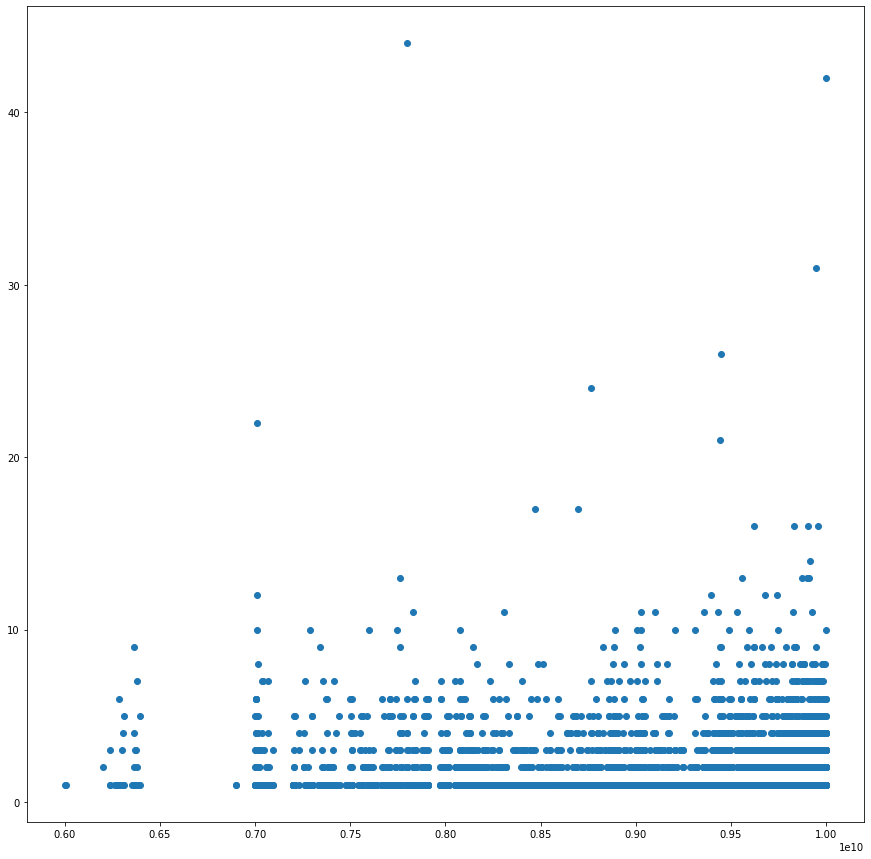

In [63]:
plt.scatter(rfm['MobileNo'],rfm['Frequency'])

In [77]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [78]:
y_predicted = km.fit_predict(rfm[['MobileNo','Recency']])
y_predicted

array([2, 2, 2, ..., 0, 0, 0])

In [85]:
recency['cluster']=y_predicted
recency

,MobileNo,Diff,cluster
0,6.000567e+09,3,2
1,6.005564e+09,102,2
2,6.200285e+09,54,2
3,6.238130e+09,76,2
4,6.238134e+09,11,2
...,...,...,...
4879,9.999988e+09,93,0
4880,9.999990e+09,38,0
4881,9.999997e+09,97,0
4882,9.999999e+09,65,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


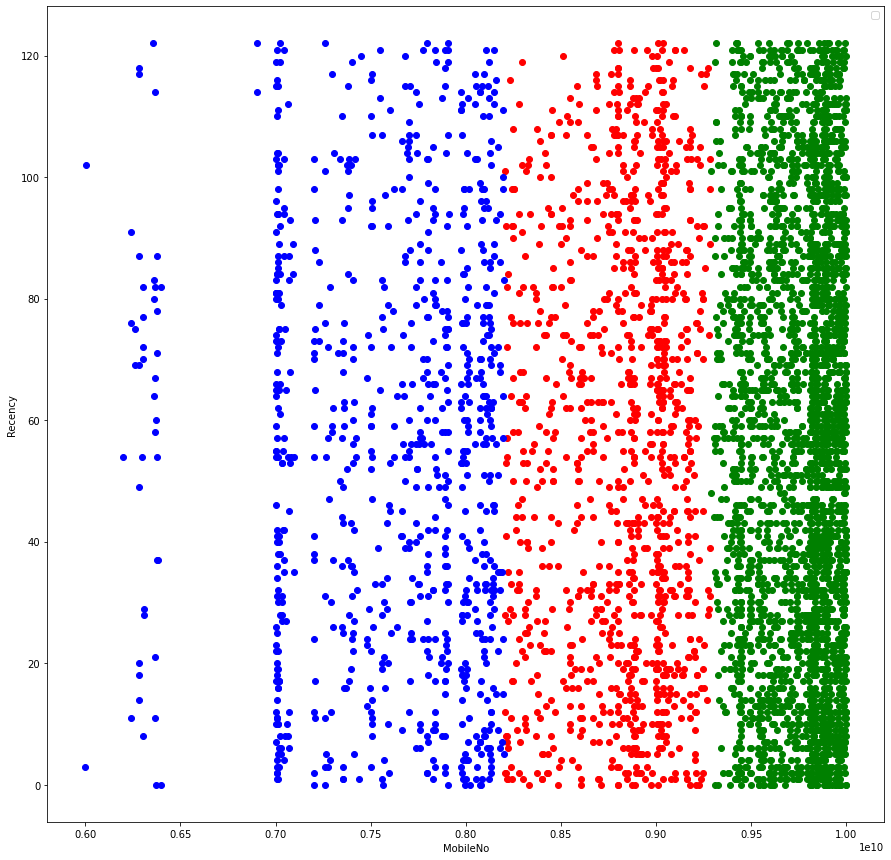

In [87]:
f1 = recency[recency.cluster==0]
f2 = recency[recency.cluster==1]
f3 = recency[recency.cluster==2]

plt.scatter(f1.MobileNo,f1['Diff'],color='green')
plt.scatter(f2.MobileNo,f2['Diff'],color='red')
plt.scatter(f3.MobileNo,f3['Diff'],color='blue')

plt.xlabel('MobileNo')
plt.ylabel('Recency')
plt.legend()

In [81]:
y_predicted = km.fit_predict(rfm[['MobileNo','Frequency']])
y_predicted

array([2, 2, 2, ..., 0, 0, 0])

In [89]:
frequency['cluster']=y_predicted
frequency

,MobileNo,OrderDate,cluster
0,6.000567e+09,1,2
1,6.005564e+09,1,2
2,6.200285e+09,2,2
3,6.238130e+09,1,2
4,6.238134e+09,3,2
...,...,...,...
4879,9.999988e+09,6,0
4880,9.999990e+09,1,0
4881,9.999997e+09,1,0
4882,9.999999e+09,4,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


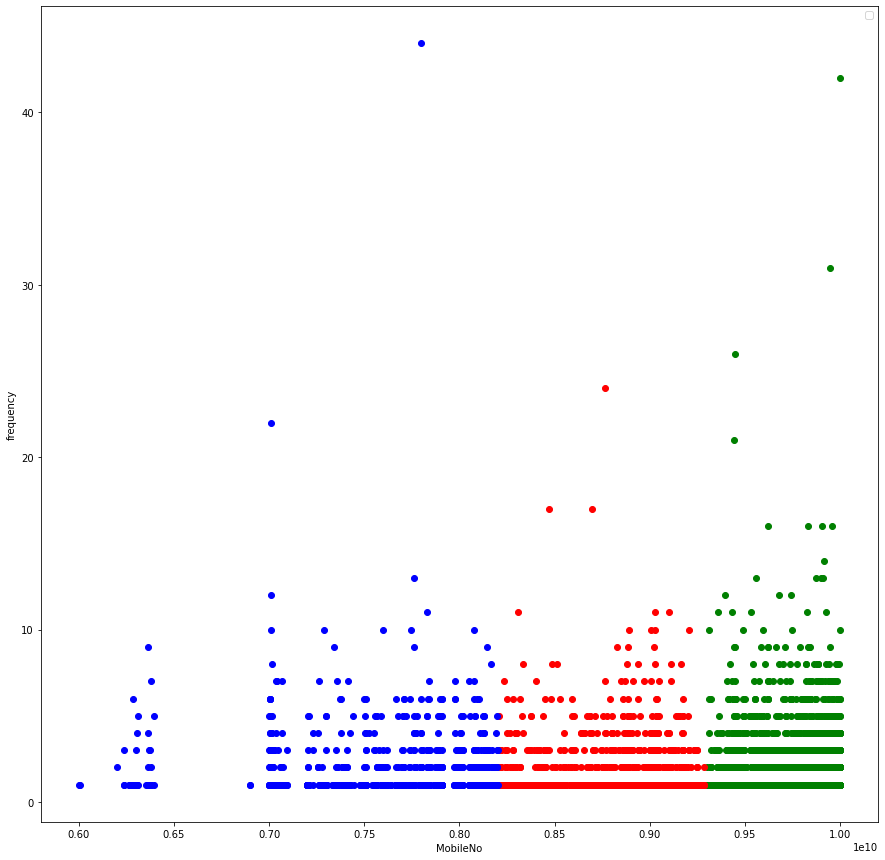

In [99]:
f1 = frequency[frequency.cluster==0]
f2 = frequency[frequency.cluster==1]
f3 = frequency[frequency.cluster==2]

plt.scatter(f1.MobileNo,f1['OrderDate'],color='green')
plt.scatter(f2.MobileNo,f2['OrderDate'],color='red')
plt.scatter(f3.MobileNo,f3['OrderDate'],color='blue')

plt.xlabel('MobileNo')
plt.ylabel('frequency')
plt.legend()

In [92]:
y_predicted = km.fit_predict(rfm[['MobileNo','Monetary']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [93]:
monetary['cluster']=y_predicted
monetary

,MobileNo,TotalBillingAmount,cluster
0,6.000567e+09,790.0,0
1,6.005564e+09,490.0,0
2,6.200285e+09,1580.0,0
3,6.238130e+09,350.0,0
4,6.238134e+09,2475.0,0
...,...,...,...
4879,9.999988e+09,6276.0,1
4880,9.999990e+09,1130.0,1
4881,9.999997e+09,2111.0,1
4882,9.999999e+09,11652.0,1


Text(0, 0.5, 'monetary')

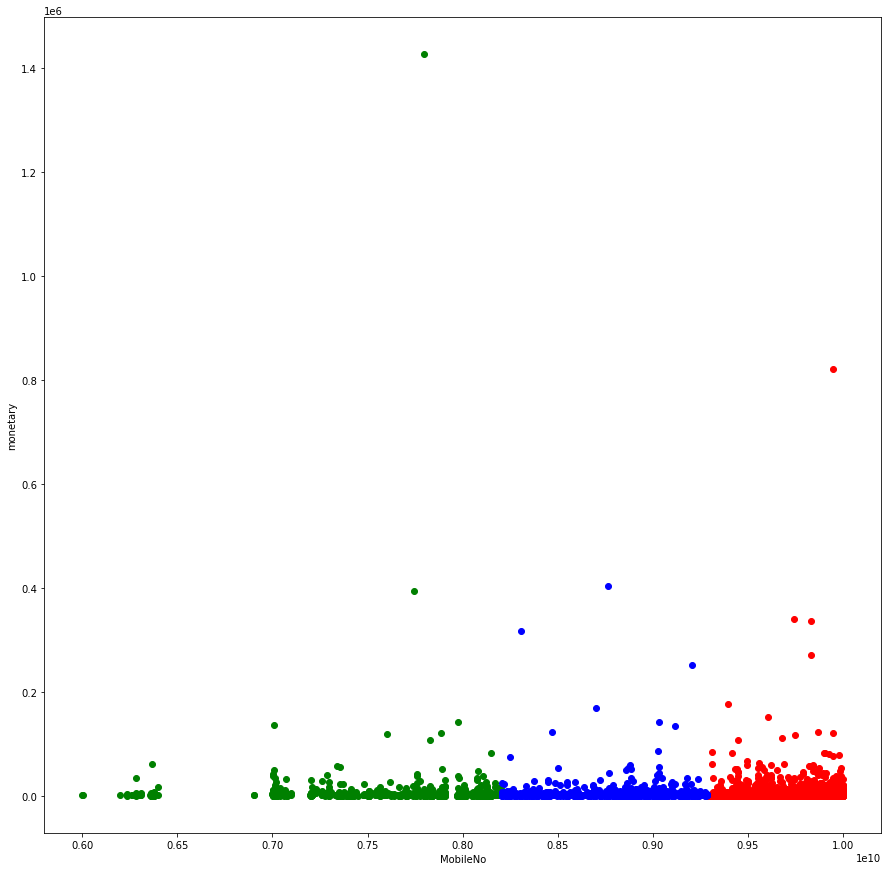

In [98]:
f1 = monetary[monetary.cluster==0]
f2 = monetary[monetary.cluster==1]
f3 = monetary[monetary.cluster==2]

plt.scatter(f1.MobileNo,f1['TotalBillingAmount'],color='green')
plt.scatter(f2.MobileNo,f2['TotalBillingAmount'],color='red')
plt.scatter(f3.MobileNo,f3['TotalBillingAmount'],color='blue')

plt.xlabel('MobileNo')
plt.ylabel('monetary')
plt.legend()

In [103]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [104]:
y_predicted = km.fit_predict(segmented_rfm[['MobileNo','RFM_Score']])
y_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [105]:
segmented_rfm['cluster ']=y_predicted
segmented_rfm

,MobileNo,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,cluster
0,6.000567e+09,3,1,790.0,1,4,4,144,9,1
1,6.005564e+09,102,1,490.0,4,4,4,444,12,1
2,6.200285e+09,54,2,1580.0,2,2,3,223,7,1
3,6.238130e+09,76,1,350.0,3,4,4,344,11,1
4,6.238134e+09,11,3,2475.0,1,1,2,112,4,1
...,...,...,...,...,...,...,...,...,...,...
4879,9.999988e+09,93,6,6276.0,4,1,1,411,6,0
4880,9.999990e+09,38,1,1130.0,2,4,3,243,9,0
4881,9.999997e+09,97,1,2111.0,4,4,2,442,10,0
4882,9.999999e+09,65,4,11652.0,3,1,1,311,5,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


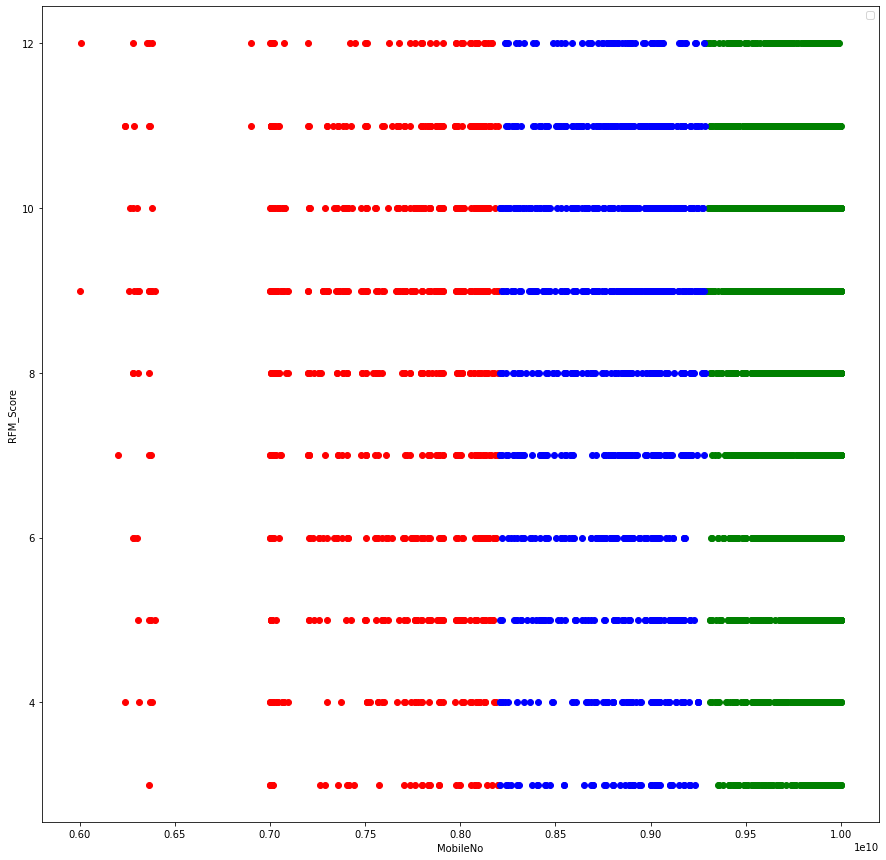

In [106]:
f1 = segmented_rfm[segmented_rfm.cluster==0]
f2 = segmented_rfm[segmented_rfm.cluster==1]
f3 = segmented_rfm[segmented_rfm.cluster==2]

plt.scatter(f1.MobileNo,f1['RFM_Score'],color='green')
plt.scatter(f2.MobileNo,f2['RFM_Score'],color='red')
plt.scatter(f3.MobileNo,f3['RFM_Score'],color='blue')

plt.xlabel('MobileNo')
plt.ylabel('RFM_Score')
plt.legend()

In [108]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(segmented_rfm[['MobileNo','RFM_Score']])
    sse.append(km.inertia_)

In [109]:
sse

[3.660715320127296e+21,
 8.736326310609201e+20,
 4.0149716129537694e+20,
 2.1737659259933603e+20,
 1.3579046713406967e+20,
 9.822646482703791e+19,
 7.2758572176048775e+19,
 5.5053622181738955e+19,
 4.260383389268652e+19]

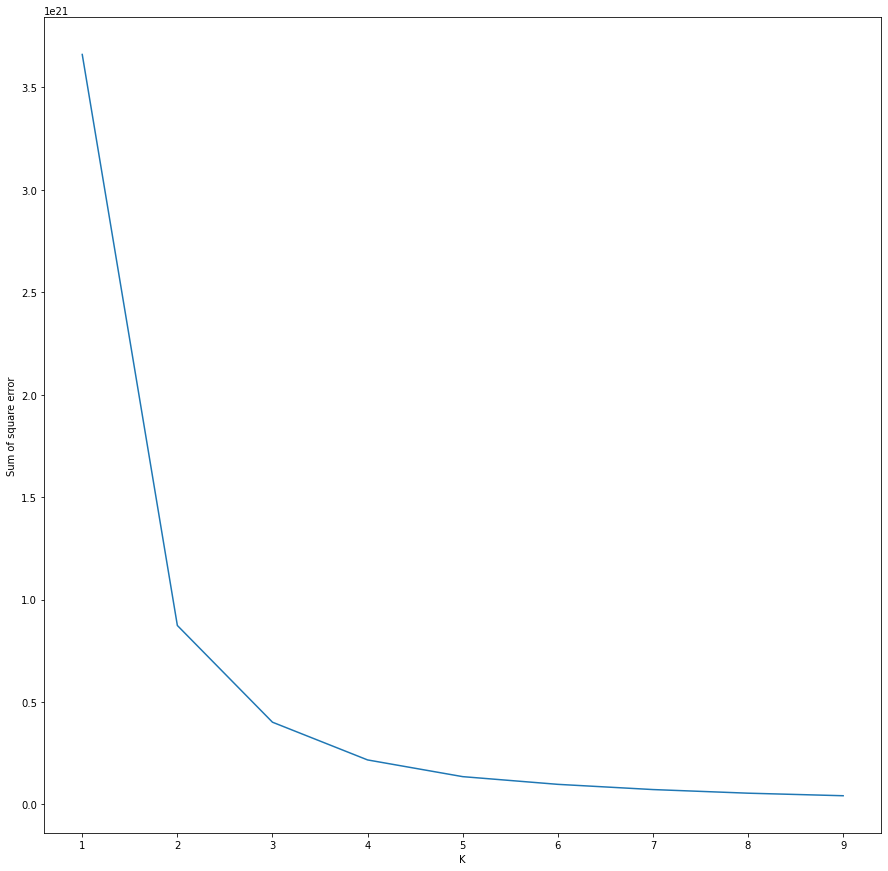

In [110]:
plt.xlabel('K')
plt.ylabel('Sum of square error')
plt.plot(k_rng,sse)